In [1]:
import datetime
import time as tm
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

from Model.Model import foodColectionModel

In [2]:
WIDTH = 100
HEIGHT = 100
NUM_RECOLECTORS = 2
NUM_EXPLORERS = 3
TOTAL_FOOD = 47
ITER = 100

model = foodColectionModel(WIDTH, HEIGHT, NUM_RECOLECTORS, NUM_EXPLORERS, TOTAL_FOOD)

for i in range(ITER):
    model.step()


C:\Users\diego\AppData\Local\Temp\ipykernel_29484\3317726587.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch = plt.imshow(all_data.iloc[0][0], cmap="Greens")
C:\Users\diego\AppData\Local\Temp\ipykernel_29484\3317726587.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch.set_data(all_data.iloc[i][0])


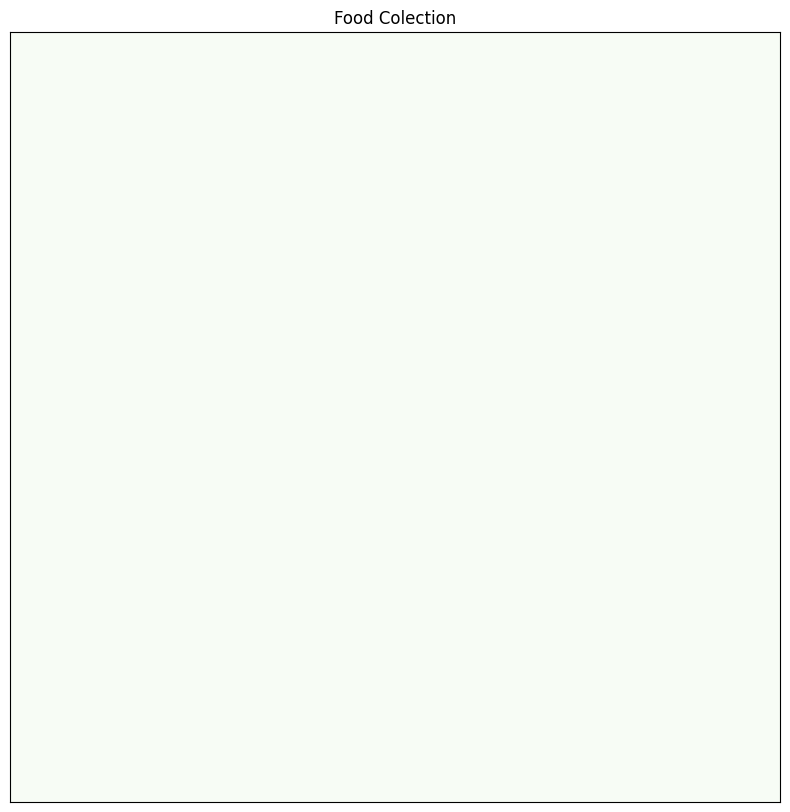

In [5]:
all_data = model.datacollector.get_model_vars_dataframe()

fig, axis = plt.subplots(figsize=(10, 10))
axis.set_title("Food Colection")
axis.set_xticks([])
axis.set_yticks([])

patch = plt.imshow(all_data.iloc[0][0], cmap="Greens")

def animate(i):
    patch.set_data(all_data.iloc[i][0])
    return patch

anim = animation.FuncAnimation(fig, animate, frames=ITER, interval=100)
anim